#### **Setup**

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as T
from torch.utils.data import Subset, DataLoader

from utils import show_image_samples, RunConfig
from resnet import ResNet9, start_run, evaluate_model, set_global_seed

set_global_seed(42)

### **MNIST**

#### **Data Preparation**

In [14]:
transforms = T.Compose([
    T.Resize((36, 36)),
    T.RandomCrop((32, 32)),
    T.ToTensor(),
    T.Grayscale(num_output_channels=1),
    T.RandomInvert()
])

train_n_val_dataset = torchvision.datasets.MNIST(root='./data/mnist/train', train=True, download=True, transform=transforms)
test_dataset = torchvision.datasets.MNIST(root='./data/mnist/test', train=False, download=True, transform=transforms)

train_dataset = Subset(train_n_val_dataset, range(50000))
val_dataset = Subset(train_n_val_dataset, range(50000, len(train_n_val_dataset)))

del train_n_val_dataset

print(f"Train size: {len(train_dataset)} | Val size: {len(val_dataset)} | Test size: {len(test_dataset)}")

Train size: 50000 | Val size: 10000 | Test size: 10000


Labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


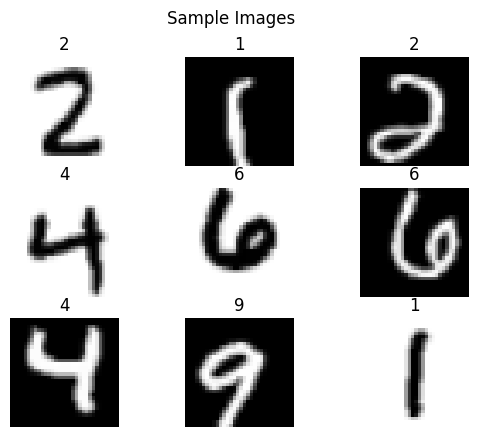

In [15]:
show_image_samples(test_dataset)
print("Labels: ", set(test_dataset.targets.tolist()))

#### **Model**

In [24]:
config = RunConfig('configs/mnist_config.yaml')
model = ResNet9(num_classes=config.model['num_classes']) 

_ = model.num_parameters()

Total Params: 7195594 | Trainable Params: 7195594


In [25]:
train_loader = DataLoader(train_dataset, batch_size=config.train['batch_size'], shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=config.train['batch_size'], shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=config.train['batch_size'], shuffle=False)

,train_loss,train_accuracy,val_loss,val_accuracy
epoch,,,,
1,0.230447,0.92888,0.084289,0.9724
2,0.055706,0.98270,0.042960,0.9859
3,0.042728,0.98664,0.050363,0.9847
4,0.036034,0.98858,0.050496,0.9838
5,0.030780,0.99052,0.025439,0.9912


/Users/irsh/Documents/workdir/ec69210/exp2/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


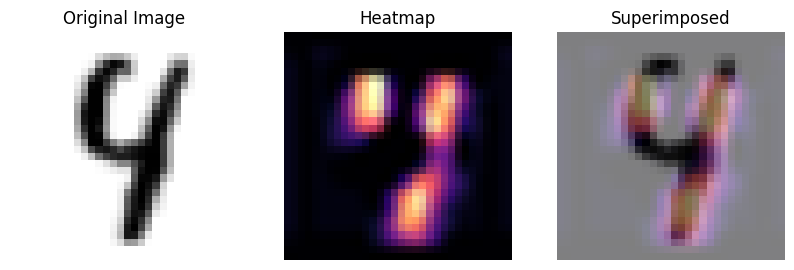

Model saved to ./trained/mnist.pth


  0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 99.14%


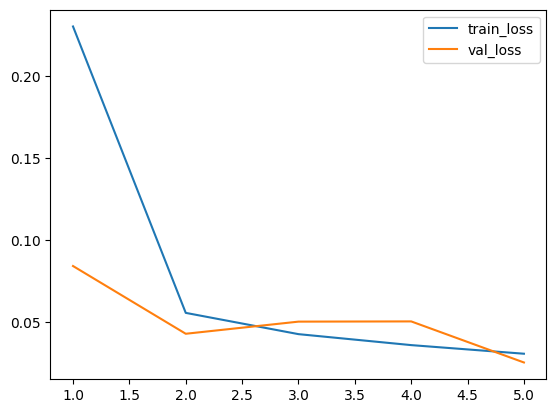

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.train["learning_rate"])

trained_model, logger = start_run(model, train_loader, val_loader, test_loader, criterion, optimizer, config)
logger.plot_run(keys=['train_loss', 'val_loss'])

### **Hindi**

#### **Data Preparation**

In [27]:
transforms = T.Compose([
    T.Resize((36, 36)),
    T.RandomCrop((32, 32)),
    T.ToTensor(),
    T.Grayscale(num_output_channels=1),
    T.RandomInvert()
])

train_n_val_dataset = torchvision.datasets.ImageFolder(root='./data/hindi/train', transform=transforms)
test_dataset = torchvision.datasets.ImageFolder(root='./data/hindi/test', transform=transforms)

class HindiDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, class2idx):
        self.dataset = self.filter_targets(dataset)
        self.targets = [label - 36 for _, label in self.dataset]
        self.class_to_idx = class2idx
        self.class_to_idx = {k: v - 36 for k, v in self.class_to_idx.items() if v >= 36}

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        return img, label - 36

    def __len__(self):
        return len(self.dataset)

    def filter_targets(self, dataset):
        filtered_indices = [i for i, (_, label) in enumerate(dataset) if label >= 36]
        return Subset(dataset, filtered_indices)

train_n_val_dataset = HindiDataset(train_n_val_dataset, train_n_val_dataset.class_to_idx)
test_dataset = HindiDataset(test_dataset, test_dataset.class_to_idx)

train_dataset = Subset(train_n_val_dataset, range(len(train_n_val_dataset)-len(test_dataset)))
val_dataset = Subset(train_n_val_dataset, range(len(train_n_val_dataset)-len(test_dataset), len(train_n_val_dataset)))

del train_n_val_dataset

print(f"Train size: {len(train_dataset)} | Val size: {len(val_dataset)} | Test size: {len(test_dataset)}")

Train size: 14000 | Val size: 3000 | Test size: 3000


In [28]:
class2idx = test_dataset.class_to_idx
idx2class = {v: k for k, v in class2idx.items()}

Labels:  ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


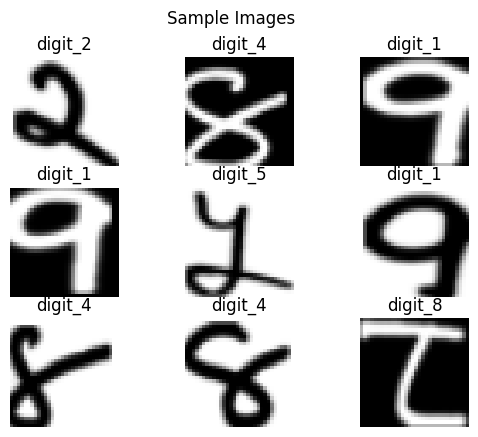

In [29]:
show_image_samples(test_dataset, idx2class)
print("Labels: ", [idx2class[char] for char in set(test_dataset.targets)])

#### **Model**

In [ ]:
config = RunConfig('configs/hindi_config.yaml')
model = ResNet9(num_classes=config.model['num_classes']) 

_ = model.num_parameters()

Total Params: 7195594 | Trainable Params: 7195594


In [34]:
train_loader = DataLoader(train_dataset, batch_size=config.train['batch_size'], shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=config.train['batch_size'], shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=config.train['batch_size'], shuffle=False)

,train_loss,train_accuracy,val_loss,val_accuracy
epoch,,,,
1,0.823510,0.737286,3.277071,0.285333
2,0.092226,0.977143,1.013404,0.871000
3,0.036319,0.991786,1.037163,0.846333
4,0.022294,0.995214,0.914267,0.888000
5,0.013917,0.996643,1.095685,0.891667
6,0.011318,0.997500,0.980775,0.895333
7,0.007987,0.998500,0.934951,0.893000
8,0.006658,0.998857,1.095605,0.889667
9,0.009018,0.998000,1.037620,0.893667


/Users/irsh/Documents/workdir/ec69210/exp2/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


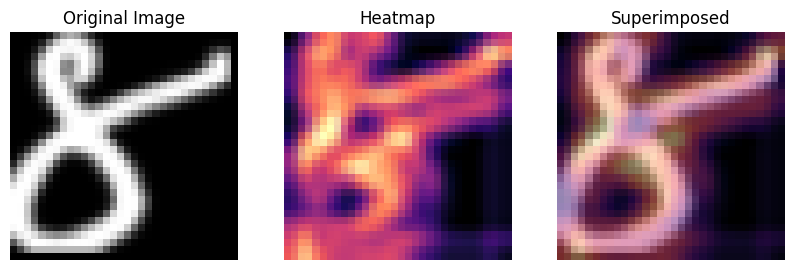

Model saved to ./trained/hindi.pth


  0%|          | 0/6 [00:00<?, ?it/s]

Test Accuracy: 89.20%


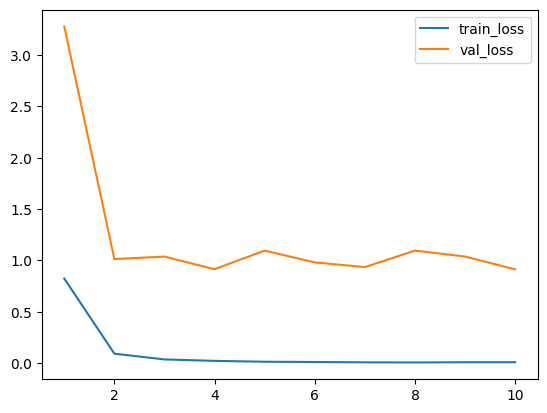

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.train["learning_rate"])

trained_model, logger = start_run(model, train_loader, val_loader, test_loader, criterion, optimizer, config)
logger.plot_run(keys=['train_loss', 'val_loss'])

### **Finetune**

In [ ]:
config = RunConfig('configs/hindi_finetune.yaml')
model = ResNet9(num_classes=config.model['num_classes']) 

print(f"Before finetuning: {evaluate_model(model, test_loader, criterion, 'mps')[1]:.2%}")

model.load('trained/mnist.pth')
model.freeze()
model.unfreeze('fc', 'resblock2')

_ = model.num_parameters()

  0%|          | 0/6 [00:00<?, ?it/s]

Before finetuning: 10.13%
Total Params: 7195594 | Trainable Params: 924170


,train_loss,train_accuracy,val_loss,val_accuracy
epoch,,,,
1,0.101559,0.970714,1.351361,0.863667
2,0.032581,0.991071,1.477476,0.884333
3,0.021883,0.994643,1.591125,0.886333
4,0.016315,0.995929,1.446223,0.884333
5,0.012959,0.997143,1.505512,0.889333
6,0.010074,0.997786,1.536492,0.891667
7,0.008215,0.998357,1.646538,0.887667
8,0.009318,0.997714,1.350642,0.891333
9,0.006701,0.998643,1.863861,0.888000


/Users/irsh/Documents/workdir/ec69210/exp2/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


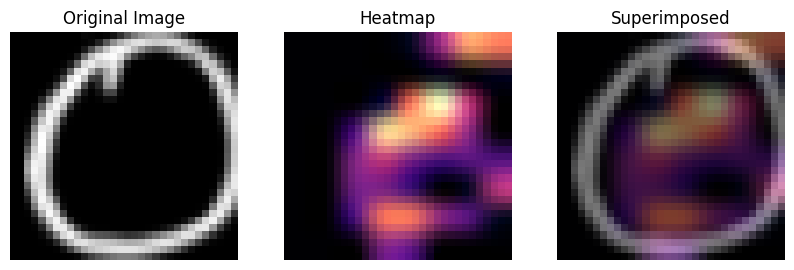

Model saved to ./trained/finetuned.pth


  0%|          | 0/6 [00:00<?, ?it/s]

Test Accuracy: 89.17%


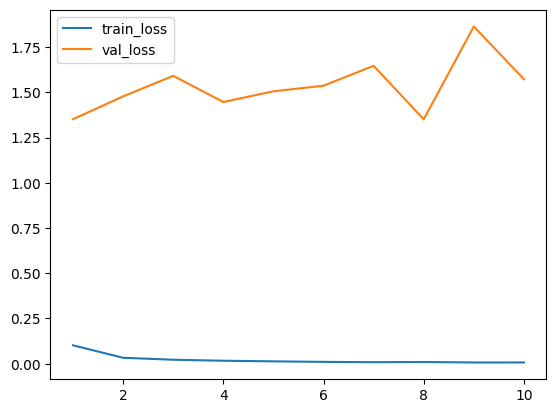

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.train["learning_rate"])

trained_model, logger = start_run(model, train_loader, val_loader, test_loader, criterion, optimizer, config, target_layer='resblock2.conv2')
logger.plot_run(keys=['train_loss', 'val_loss'])